In [2]:
#Scrape data from wikipedia...
import requests
from bs4 import BeautifulSoup
import re

In [4]:
url = 'http://www.aweo.org'

response = requests.get(url).text

soup = BeautifulSoup(response, 'html.parser')
soup.prettify()

'<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">\n <head>\n  <link href="http://www.aweo.org/favicon.ico" rel="shortcut icon" type="image/x-icon"/>\n  <meta charset="utf-8"/>\n  <meta content="Resources for debunking claims, documenting ill effects, and fighting the spread of industrial wind power." name="description"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="cause" property="og:type">\n   <meta content="aweo.org Industrial Wind Energy Opposition" property="og:title"/>\n   <meta content="AWEO" property="og:site_name"/>\n   <meta content="100001014204906" property="fb:admins"/>\n   <title>\n    aweo.org :: Industrial Wind Energy Opposition\n   </title>\n   <style type="text/css">\n    a:link { color:#660066; text-decoration:none; } \n\ta:hover { color:#0000CC; } \n\ta:active { color:#009900; } \n\ta:visited { color:#660066; \ttext-decoration:none; }\n   </style>\n  </meta>\n </head>\n 

In [11]:
bloc = soup.find_all('td')[3]

In [25]:
org = [item.text for item in bloc.find_all('a')]


sender = []

for i in range (len(org)):
    sender.append('AWEO.org')
    
print(len(sender), len(org))

80 80


In [29]:
import pandas as pd
df = pd.DataFrame()
df['sender'] = sender
df['linked_to'] = org

In [30]:
df

,sender,linked_to
0,AWEO.org,Vermonters with Vision
1,AWEO.org,Ira Wind
2,AWEO.org,Citizens for the Preservation of Georgia Mountain
3,AWEO.org,Ridge Protectors
4,AWEO.org,Kingdom Commons Group
...,...,...
75,AWEO.org,Î Î±ÏÎ±ÏÎ·ÏÎ·ÏÎ®ÏÎ¹Î¿ ÎÎ¹Î¿Î»Î¹ÎºÎ®Ï Î...
76,AWEO.org,Szélerőművek Hárskúton?
77,AWEO.org,Nepavėjui
78,AWEO.org,Rassemblement Jura Crêtes


In [31]:
import csv

df.to_csv('aweo_network.csv')

In [33]:
#make network
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(df, 'sender', 'linked_to')

/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kajsarosenblad/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kajsarosenblad/opt/anac

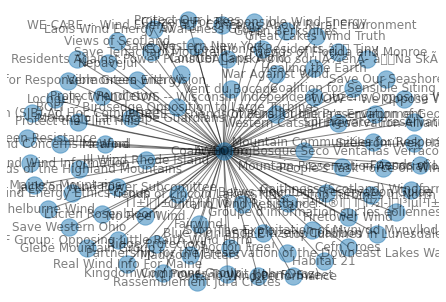

In [36]:
nx.draw(G, cmap = plt.get_cmap('Set1'), alpha = 0.5, with_labels = True)

In [39]:

from netwulf import visualize

In [ ]:
visualize(G)

In [38]:
#write to gephi

nx.write_gexf(G, 'aweo.gexf')